<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_4_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,2.774834e+05,2.776408e+05,8.187554e+05,-5.411146e+05
1,0.0,1.0,95.145814,36.678058,32.755933,1.465947e+06,1.466122e+06,-1.624734e+06,3.090856e+06
2,0.0,2.0,60.443735,47.585077,69.899609,5.791449e+06,5.791637e+06,6.302954e+05,5.161342e+06
3,0.0,3.0,31.749471,39.444064,81.196086,-2.520994e+06,-2.520832e+06,2.110315e+04,-2.541935e+06
4,0.0,4.0,75.571924,28.101242,59.999407,2.407442e+05,2.409179e+05,1.318067e+06,-1.077149e+06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-8.060171e+05,-8.058588e+05,-8.392441e+05,3.338531e+04
59996,999.0,56.0,64.963417,65.855822,20.013285,3.459549e+07,3.459566e+07,-4.202726e+06,3.879838e+07
59997,999.0,57.0,28.983831,65.042478,32.769278,-2.263722e+07,-2.263708e+07,-1.162603e+07,-1.101105e+07
59998,999.0,58.0,92.143225,62.373276,34.331948,1.096929e+07,1.096948e+07,3.335111e+06,7.634373e+06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,2.774834e+05,2.776408e+05,8.187554e+05,-5.411146e+05
1,0.0,1.0,95.145814,36.678058,32.755933,1.465947e+06,1.466122e+06,-1.624734e+06,3.090856e+06
2,0.0,2.0,60.443735,47.585077,69.899609,5.791449e+06,5.791637e+06,6.302954e+05,5.161342e+06
3,0.0,3.0,31.749471,39.444064,81.196086,-2.520994e+06,-2.520832e+06,2.110315e+04,-2.541935e+06
4,0.0,4.0,75.571924,28.101242,59.999407,2.407442e+05,2.409179e+05,1.318067e+06,-1.077149e+06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-8.060171e+05,-8.058588e+05,-8.392441e+05,3.338531e+04
59996,999.0,56.0,64.963417,65.855822,20.013285,3.459549e+07,3.459566e+07,-4.202726e+06,3.879838e+07
59997,999.0,57.0,28.983831,65.042478,32.769278,-2.263722e+07,-2.263708e+07,-1.162603e+07,-1.101105e+07
59998,999.0,58.0,92.143225,62.373276,34.331948,1.096929e+07,1.096948e+07,3.335111e+06,7.634373e+06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    21.640995  34.925259  ...  8.187554e+05 -5.411146e+05
      1.0    95.145814  36.678058  ... -1.624734e+06  3.090856e+06
      2.0    60.443735  47.585077  ...  6.302954e+05  5.161342e+06
      3.0    31.749471  39.444064  ...  2.110315e+04 -2.541935e+06
      4.0    75.571924  28.101242  ...  1.318067e+06 -1.077149e+06
...                ...        ...  ...           ...           ...
999.0 55.0   27.655950  26.943522  ... -8.392441e+05  3.338531e+04
      56.0   64.963417  65.855822  ... -4.202726e+06  3.879838e+07
      57.0   28.983831  65.042478  ... -1.162603e+07 -1.101105e+07
      58.0   92.143225  62.373276  ...  3.335111e+06  7.634373e+06
      59.0   23.025996  28.855452  ... -5.245672e+06  4.854612e+06

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    21.640995  34.925259  ...  8.187554e+05 -5.411146e+05
      1.0    95.145814  36.678058  ... -1.624734e+06  3.090856e+06
      2.0    60.443735  47.585077  ...  6.302954e+05  5.161342e+06
      3.0    31.749471  39.444064  ...  2.110315e+04 -2.541935e+06
      4.0    75.571924  28.101242  ...  1.318067e+06 -1.077149e+06
...                ...        ...  ...           ...           ...
999.0 55.0   27.655950  26.943522  ... -8.392441e+05  3.338531e+04
      56.0   64.963417  65.855822  ... -4.202726e+06  3.879838e+07
      57.0   28.983831  65.042478  ... -1.162603e+07 -1.101105e+07
      58.0   92.143225  62.373276  ...  3.335111e+06  7.634373e+06
      59.0   23.025996  28.855452  ... -5.245672e+06  4.854612e+06

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,2.774834e+05,2.776408e+05,8.187554e+05,-5.411146e+05
1,0.0,1.0,95.145814,36.678058,32.755933,1.465947e+06,1.466122e+06,-1.624734e+06,3.090856e+06
2,0.0,2.0,60.443735,47.585077,69.899609,5.791449e+06,5.791637e+06,6.302954e+05,5.161342e+06
3,0.0,3.0,31.749471,39.444064,81.196086,-2.520994e+06,-2.520832e+06,2.110315e+04,-2.541935e+06
4,0.0,4.0,75.571924,28.101242,59.999407,2.407442e+05,2.409179e+05,1.318067e+06,-1.077149e+06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-8.060171e+05,-8.058588e+05,-8.392441e+05,3.338531e+04
59996,999.0,56.0,64.963417,65.855822,20.013285,3.459549e+07,3.459566e+07,-4.202726e+06,3.879838e+07
59997,999.0,57.0,28.983831,65.042478,32.769278,-2.263722e+07,-2.263708e+07,-1.162603e+07,-1.101105e+07
59998,999.0,58.0,92.143225,62.373276,34.331948,1.096929e+07,1.096948e+07,3.335111e+06,7.634373e+06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    21.640995  34.925259  ...  8.187554e+05 -5.411146e+05
      1.0    95.145814  36.678058  ... -1.624734e+06  3.090856e+06
      2.0    60.443735  47.585077  ...  6.302954e+05  5.161342e+06
      3.0    31.749471  39.444064  ...  2.110315e+04 -2.541935e+06
      4.0    75.571924  28.101242  ...  1.318067e+06 -1.077149e+06
...                ...        ...  ...           ...           ...
999.0 55.0   27.655950  26.943522  ... -8.392441e+05  3.338531e+04
      56.0   64.963417  65.855822  ... -4.202726e+06  3.879838e+07
      57.0   28.983831  65.042478  ... -1.162603e+07 -1.101105e+07
      58.0   92.143225  62.373276  ...  3.335111e+06  7.634373e+06
      59.0   23.025996  28.855452  ... -5.245672e+06  4.854612e+06

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

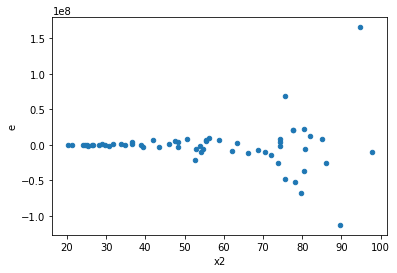

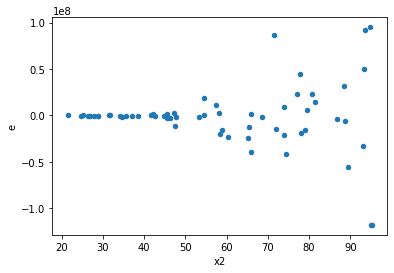

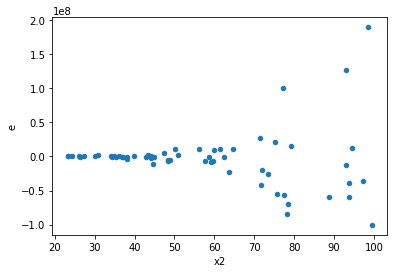

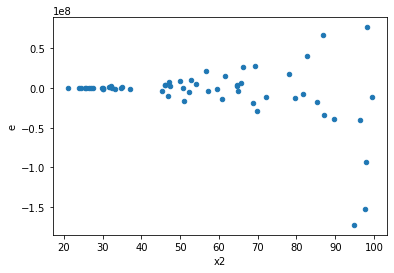

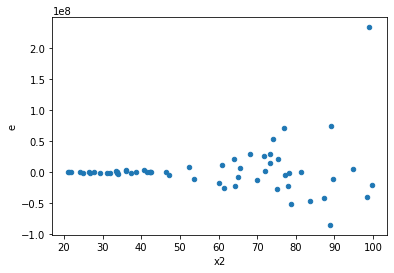

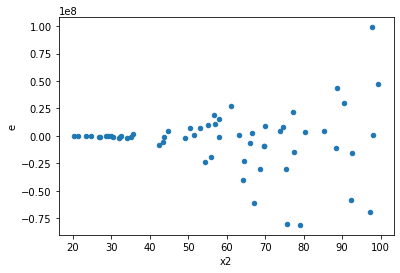

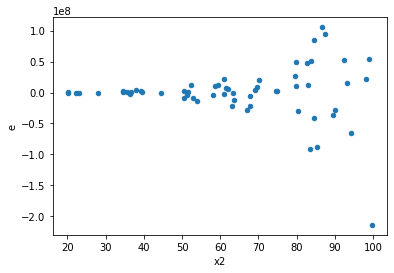

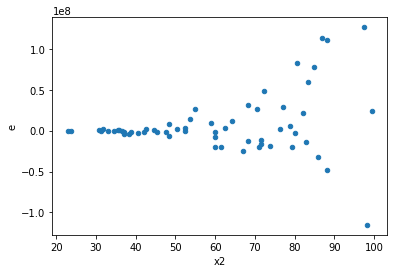

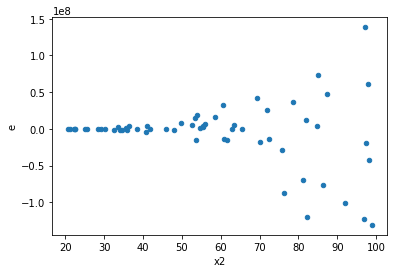

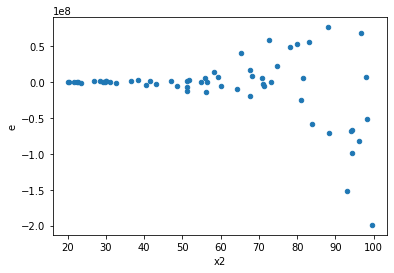

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,5.691270397092167e+16,117086224288171.44,2845635198546083.5,5854311214408.572,486.075149462918,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,6.7694381505651016e+16,116257472772242.19,3384719075282551.0,5812873638612.109,582.2798302029994,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,8.469561708876848e+16,126183898093001.77,4234780854438424.0,6309194904650.088,671.2078036006224,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,6.151515000311989e+16,119219279201097.98,3075757500155994.5,5960963960054.899,515.9832404233605,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,8.241823431057568e+16,35384694034929.39,4120911715528784.0,1769234701746.4695,2329.2057924598116,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,3.64492811091226e+16,206718570735771.38,1822464055456130.0,10335928536788.568,176.3232058899645,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,1.046250111930623e+17,823826760500149.8,5231250559653115.0,41191338025007.484,126.99880145862691,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,6.06307968931667e+16,153174315403472.97,3031539844658335.0,7658715770173.648,395.82874409107364,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,1.018706808447843e+17,117844704393323.83,5093534042239215.0,5892235219666.191,864.4485246004446,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,5.691270397092167e+16,117086224288171.44,2845635198546083.5,5854311214408.572,486.075149462918,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,6.7694381505651016e+16,116257472772242.19,3384719075282551.0,5812873638612.109,582.2798302029994,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,8.469561708876848e+16,126183898093001.77,4234780854438424.0,6309194904650.088,671.2078036006224,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,6.151515000311989e+16,119219279201097.98,3075757500155994.5,5960963960054.899,515.9832404233605,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,8.241823431057568e+16,35384694034929.39,4120911715528784.0,1769234701746.4695,2329.2057924598116,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,3.64492811091226e+16,206718570735771.38,1822464055456130.0,10335928536788.568,176.3232058899645,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,1.046250111930623e+17,823826760500149.8,5231250559653115.0,41191338025007.484,126.99880145862691,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,6.06307968931667e+16,153174315403472.97,3031539844658335.0,7658715770173.648,395.82874409107364,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,1.018706808447843e+17,117844704393323.83,5093534042239215.0,5892235219666.191,864.4485246004446,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64